# CSC 3105 Project

In [10]:
import os

DATASET_DIR = './UWB-LOS-NLOS-Data-Set/dataset'

# Load the data into a pandas dataframe

The first step in any data analysis project is to load the data into a suitable data structure. In this case, we will use the `pandas` library to load the data into a dataframe.

We then clean the data by handling missing values, removing duplicates, converting data types, and performing outlier detection and removal. 

In [11]:
import pandas as pd
import numpy as np
from scipy import stats


def load_data(dataset_dir):
    # Load the data
    file_paths = [os.path.join(dirpath, file) for dirpath, _, filenames in os.walk(dataset_dir) for file in filenames]
    data = pd.concat((pd.read_csv(file_path) for file_path in file_paths))
    print(f"Original data shape: {data.shape}")
    return data


def clean_data(data):
    # Calculate total number of missing values
    total_missing = data.isnull().sum().sum()
    print(f"Total number of missing values: {total_missing}")
    
    # Handle missing values
    data = data.dropna()

    # Remove duplicates
    data = data.drop_duplicates()

    # Convert data types
    data['NLOS'] = data['NLOS'].astype(int)

    # Outlier detection and removal
    z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
    data = data[(z_scores < 3).any(axis=1)]

    print(f"Cleaned data shape: {data.shape}")
    return data


# Use the functions
data = load_data(DATASET_DIR)
data = clean_data(data)

# print(data.head())

# Print Headers
# print(data.columns)

Original data shape: (42000, 1031)
Total number of missing values: 0
Cleaned data shape: (42000, 1031)


The selected code is performing data standardization, which is a common preprocessing step in many machine learning workflows. 

The purpose of standardization is to transform the data such that it has a mean of 0 and a standard deviation of 1. This is done to ensure that all features have the same scale, which is a requirement for many machine learning algorithms.

The mathematical formulas used in this process are as follows:

1. Calculate the mean (μ) of the data:

$$
\mu = \frac{1}{n} \sum_{i=1}^{n} x_i
$$
Where:
- $n$ is the number of observations in the data
- $x_i$ is the value of the $i$-th observation
- $\sum$ denotes the summation over all observations

2. Standardize the data by subtracting the mean from each observation and dividing by the standard deviation:

$$
\text{Data}_i = \frac{x_i - \mu}{\sigma}
$$
Where:
- $\text{Data}_i$ is the standardized value of the $i$-th observation
- $\sigma$ is the standard deviation of the data
- $x_i$ is the value of the $i$-th observation
- $\mu$ is the mean of the data

The `StandardScaler` class from the `sklearn.preprocessing` module is used to perform this standardization. The `fit_transform` method is used to calculate the mean and standard deviation of the data and then perform the standardization.

**Note:** By setting the explained variance to 0.95, we are saying that we want to choose the smallest number of principal components such that 95% of the variance in the original data is retained. This means that the transformed data will retain 95% of the information of the original data, while potentially having fewer dimensions.


In [12]:
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

# Standardize the data
numerical_cols = data.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Initialize PCA with the desired explained variance
pca = PCA(0.95)

# Fit PCA to your data
pca.fit(data)

# Get the number of components
num_components = pca.n_components_

print(f"The number of principle components after PCA is {num_components}")

The number of principle components after PCA is 868


# Perform Dimensionality Reduction with PCA

We can use the `transform` method of the `PCA` object to project the original data onto the principal components. This will give us the transformed data with the desired number of components.

In [13]:
# Project original data to PC with the highest eigenvalue
data_pca = pca.transform(data)

# Create a dataframe with the principal components
data_pca_df = pd.DataFrame(data_pca, columns=[f"PC{i}" for i in range(1, num_components + 1)])

# Print the number of components in the original and PCA transformed data
print(f"Original number of components: {data.shape[1]}")
print(f"Number of components after PCA: {num_components}")

# Compare the number of components in the original and PCA transformed data
if data.shape[1] > num_components:
    print("PCA has successfully reduced the number of components.")
elif data.shape[1] < num_components:
    print("Unexpectedly, PCA has increased the number of components.")
else:
    print("The number of components remains unchanged after PCA.")

Original number of components: 1031
Number of components after PCA: 868
PCA has successfully reduced the number of components.


## Data Mining / Machine Learning

### I. Supervised Learning
- **Decision**: Supervised learning is used due to the labeled dataset.
- **Algorithm**: Random Forest Classifier is preferred for its performance in classification tasks.

### II. Training/Test Split Ratio
- **Decision**: 70:30 split is chosen for training/test dataset.
- **Reasoning**: This split ensures sufficient data for training and testing.

### III. Performance Metrics
- **Classification Accuracy**: Measures the proportion of correctly classified instances.
- **Confusion Matrix**: Provides a summary of predicted and actual classes.
- **Classification Report**: Provides detailed metrics such as precision, recall, F1-score, and support for each class.

The Random Forest Classifier is trained on the training set and evaluated on the test set using accuracy and classification report metrics.


# Split the data into training and testing sets

The next step is to split the data into training and testing sets. This is a common practice in machine learning, where the training set is used to train the model, and the testing set is used to evaluate its performance.

We will use the `train_test_split` function from the `sklearn.model_selection` module to split the data into training and testing sets. We will use 70% of the data for training and 30% for testing, which is a common split ratio.

In [14]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data_pca_df, data['NLOS'], test_size=0.3, random_state=42)

# Train a Random Forest Classifier

The next step is to train a machine learning model on the training data. We will use the `RandomForestClassifier` class from the `sklearn.ensemble` module to train a random forest classifier.

The random forest classifier is an ensemble learning method that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

We will use the `fit` method of the `RandomForestClassifier` object to train the model on the training data.

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Evaluate the Model

To evaluate the performance of the trained model on the testing data, we will use the `predict` method of the `RandomForestClassifier` object to make predictions on the testing data. We will then use the `accuracy_score` and `classification_report` functions from the `sklearn.metrics` module to calculate the accuracy and generate a classification report.

- **Accuracy:** The accuracy score function calculates the proportion of correctly classified instances.

- **Precision:** The ratio of correctly predicted positive observations to the total predicted positive observations. It is calculated as:

  $$
  \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
  $$

- **Recall:** The ratio of correctly predicted positive observations to all observations in the actual class. It is calculated as:

  $$
  \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
  $$

- **F1 Score:** The weighted average of precision and recall. It is calculated as:

  $$
  \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
  $$

- **Support:** The number of actual occurrences of the class in the dataset.

The classification report provides a summary of the precision, recall, F1-score, and support for each class in the testing data, giving insight into how well the model is performing for each class.


In [16]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_rep}")


Accuracy: 0.8527777777777777
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.82      0.91      0.86      6311
         1.0       0.90      0.80      0.84      6289

    accuracy                           0.85     12600
   macro avg       0.86      0.85      0.85     12600
weighted avg       0.86      0.85      0.85     12600


# Visualize a Decision Tree from the Random Forest


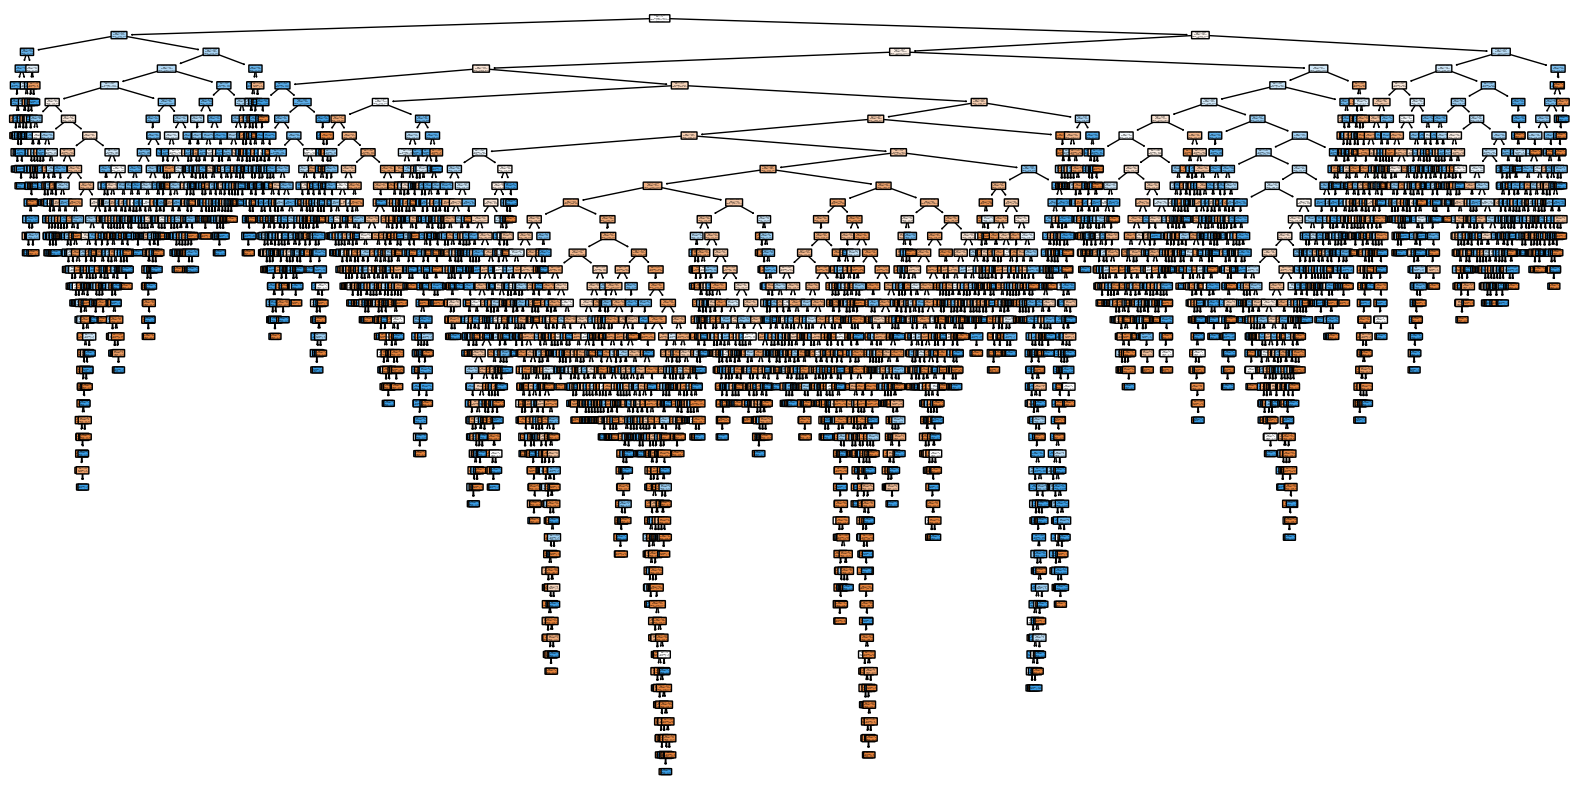

In [17]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Select one tree from the forest
estimator = classifier.estimators_[0]

plt.figure(figsize=(20,10))
plot_tree(estimator, 
          filled=True, 
          rounded=True, 
          class_names=['NLOS', 'LOS'], 
          feature_names=data_pca_df.columns)
plt.show()

# Support Vector Machine (SVM)

In [18]:
from sklearn.svm import SVC

# Support Vector Machine
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [19]:
from sklearn.metrics import accuracy_score

# Predict the labels for the test set with each model
y_pred_svm = svm.predict(X_test)

# Calculate the accuracy of each model
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Print the accuracy of each model
print(f"Accuracy of SVM: {accuracy_svm}")

Accuracy of SVM: 0.9780952380952381


# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [21]:
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Accuracy of Logistic Regression: {accuracy_log_reg}")

Accuracy of Logistic Regression: 0.9806349206349206


# Gradient Boosting Classifier

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [23]:
y_pred_gbc = gbc.predict(X_test)
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
print(f"Accuracy of Gradient Boosting Classifier: {accuracy_gbc}")


Accuracy of Gradient Boosting Classifier: 0.8892063492063492


# K-Nearest Neighbors (KNN, K=3)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [25]:
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy of K-Nearest Neighbors: {accuracy_knn}")

Accuracy of K-Nearest Neighbors: 0.6798412698412698
